<div style="text-align: right"> <h1> <b> FIT1043 Introduction to Data Science </b> </h1>  </div>
<div style="text-align: right"> <h1> <b> Assignment 1 </b> </h1>  </div>

<div style="text-align: right"> <h3> Kuah Jia Chen  </h3>  </div>
<div style="text-align: right"> <h3> 32286988  </h3>  </div>

<hr style="height:3px;border-width:0;color:gray;background-color:gray">

# Introduction

The objective of this assignment is to investigate and visualize data given using Python and several Python libraries. There are three datasets given, which are "Vaccination.csv", "2019-GDP.csv", and "2020-Population.csv". Hence, I would be using these datasets to perform data wrangling, feature engineering, and data visualization. Eventually, a data frame that contains the information of population, total vaccinations, people fully vaccinated, GDP, and GDP per capita for 11 South East Asia Countries would be produced. The outline below shows the major steps of this submission. Subsequently, the data frame would be used to provide some statistical description according to my opinion. At last, several plots would be constructed using the data in the data frame as an assist to answer a few questions.


# Outline
1. Introduction
2. Importing Libraries
3. Vaccinations.csv
   * Read Vaccinations.csv
   * Perform data wrangling
   * Create a new data frame and merge them
4. 2020-Population.csv
   * Read 2020-Population.csv
   * Perform data wrangling
   * Merge it to the new data frame
5. 2019-GDP.csv
   * Read 2019-GDP.csv
   * Perform data wrangling
   * Feature engineering
   * Merge it to the new data frame
6. Computes GDP per capita for 11 SEA Countries
7. Final data frame
   * Statistical description
8. Question 1
   * Explanation
   * Some insights
9. Question 2
   * First bar chart
   * Second bar chart
   * Explanation
1. Question 3
   * Line graph for daily vaccination over time
   * Line graph for the cumulative vaccinations over time
   * In what circumstances would the first line graph be useful?
   * In what circumstances would the second line graph be useful?
1. Extra questions
1. Conclusion

# Importing Libraries

The first step is to import all the necessary libraries that are used in this report. 
* Pandas is an open-source data analysis tool for the python programming language. The purpose of importing this library is that we would like to use the data structure such as DataFrame and its associated functions such as reading from CSV files and so on. 
* Matplotlib is a Python library that is often used by people to create quality, interactive graphs for data visualization purposes. 
* Numpy stands for Numerical Python, it is also a Python library containing array objects and including a collection of mathematical operations work on those arrays. 

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import numpy as np

# Vaccinations.csv

#### Read Vaccinations.csv

In [2]:
vaccinations = pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Covid-19-Vaccines-Data-Analysis\data\Vaccinations.csv") 
# read the vaccination CSV file 
vaccinations.head() # show the first 5 rows 

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Show the first five-row of the CSV file to ensure the correct file is read and get the basic idea of its structure.

#### Perform Data Wrangling

In [3]:
fun = {'people_fully_vaccinated' : 'max', 'daily_vaccinations' : 'sum', }  
# the aggregation is applied to the columns 'people_fully_vaccinated' and 'daily_vaccinations' and the aggregation operation are max and sum respectively
groupbyVaccinations = vaccinations.groupby(['country','vaccines']).agg(fun) # group by country and vaccines with the groupby operation
groupbyVaccinations.head() # show the first 5 rows

,,people_fully_vaccinated,daily_vaccinations
country,vaccines,,
Albania,Pfizer/BioNTech,611.0,2336.0
Algeria,Sputnik V,NaN,69070.0
Andorra,Pfizer/BioNTech,NaN,1541.0
Anguilla,Oxford/AstraZeneca,NaN,1672.0
Argentina,Sputnik V,267061.0,748593.0


Only the two useful columns in the CSV file are extracted. The grouby method is then used to find the maximum number of  people_fully_vaccinated of each country since the maximum number would be the latest information of the number of people who are fully vaccinated for each country in the CSV file. I also use the groupby method to find the sum of the daily_vaccinations for each country to find the total_vaccinations.

In [4]:
groupbyVaccinations = groupbyVaccinations.reset_index() # reset the index 

Make the column headers to be at the same level.

In [5]:
groupbyVaccinations.rename(
    columns = {'daily_vaccinations' : 'total_vaccinations'},
    inplace = True
)

Rename the last column to "total_vaccinations"

In [6]:
groupbyVaccinations.head() # show the first 5 rows

,country,vaccines,people_fully_vaccinated,total_vaccinations
0,Albania,Pfizer/BioNTech,611.0,2336.0
1,Algeria,Sputnik V,NaN,69070.0
2,Andorra,Pfizer/BioNTech,NaN,1541.0
3,Anguilla,Oxford/AstraZeneca,NaN,1672.0
4,Argentina,Sputnik V,267061.0,748593.0


The dataframe above shows how it is looks like after rename and reset the index of columns headers.

In [7]:
groupbyVaccinations['country'].unique() # Investigate the unique domain values

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'England', 'Estonia', 'Faeroe Islands', 'Falkland Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guernsey', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan',
       'Jersey', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal',
       'Netherlands', 'New Zealand', 'Northern Cyprus',
       'Northern Ireland', 'Norway'

Investigate the unique domain values for country columns. The reason to do so is that there might be different names for a particular southeast Asia country in each CSV file, hence this is essential to ensure the data regarding those countries can be extracted when creating a new data frame.

#### Create a new data frame

In [8]:
south_east_asian_countries = pd.DataFrame({
    'country' : ['Indonesia','Vietnam','Singapore','Thailand','Philippines','Myanmar','Malaysia','Cambodia','Lao PDR',
                 'Brunei Darussalam','Timor-Leste']
}) # create a new dataframe with only 11 SEA countries

Create a new dataframe named "south_east_asian_countries", and this dataframe would be used to merge with the 
"groupbyVaccinations" in order to extract only the 11 South East Asia countries.

#### Reason for storing SEA countries name in a data frame, instead of tuple or list
In this report, I would have to merge two data frames regularly. Thus, using a data frame to store those countries' names is relatively convenient in the long run as I could simply use the merge function to extract the data regarding those countries. Unlike tuples or lists, I would have to use a for loop to check all rows of the CSV file to extract the required data, which can be time-consuming.


In [9]:
south_east_asian_countries

,country
0,Indonesia
1,Vietnam
2,Singapore
3,Thailand
4,Philippines
5,Myanmar
6,Malaysia
7,Cambodia
8,Lao PDR
9,Brunei Darussalam


Ensuring the new data frame containing the correct SEA countries' names.

#### Merge the two data frames (groupbyVaccinations and south_east_asian_countries)

In [10]:
South_East_Asia_Countries_Vaccinations = pd.merge(groupbyVaccinations,south_east_asian_countries, on = ['country'],how='right')
# merge two data frames
South_East_Asia_Countries_Vaccinations

,country,vaccines,people_fully_vaccinated,total_vaccinations
0,Indonesia,Sinovac,825650.0,2022788.0
1,Vietnam,NaN,NaN,NaN
2,Singapore,Pfizer/BioNTech,110000.0,329630.0
3,Thailand,NaN,NaN,NaN
4,Philippines,NaN,NaN,NaN
5,Myanmar,Oxford/AstraZeneca,NaN,82823.0
6,Malaysia,NaN,NaN,NaN
7,Cambodia,Sinopharm/Beijing,NaN,8171.0
8,Lao PDR,NaN,NaN,NaN
9,Brunei Darussalam,NaN,NaN,NaN


Merge two data frames by putting the parameter for "how" with "left" to make sure only the 11 South East Asia countries are
extracted with their corresponding information.

# 2020-Population.csv

#### Read 2020-Population.csv

In [11]:
population = pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Covid-19-Vaccines-Data-Analysis\data\2020-Population.csv") # read the population csv file
population.head(20) # show the first 20 rows

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,World Population Prospects 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,File POP/1-1: Total population (both sexes com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Estimates, 1950 - 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Display the first 20 rows of the file to figure out the proper way to clean the CSV file by removing unnecessary rows and columns.

#### Perform data wrangling

In [12]:
population = population.iloc[15:,] # remove the rows with 0 to 14 index
population.head(10) # show the first 10 rows after removing unnecessary rows

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
15,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
17,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
19,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
20,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
21,6,Estimates,"Less developed regions, excluding least develo...",e,934,Development Group,902,1 526 184,1 560 850,1 594 126,...,4 945 165,5 004 846,5 064 335,5 123 453,5 182 043,5 240 024,5 297 327,5 353 841,5 409 449,5 464 056
22,7,Estimates,"Less developed regions, excluding China",NaN,948,Development Group,1803,1 157 420,1 179 933,1 203 963,...,4 394 313,4 466 549,4 539 157,4 612 005,4 684 981,4 758 019,4 831 087,4 904 155,4 977 204,5 050 208
23,8,Estimates,Land-locked Developing Countries (LLDC),f,1636,Special other,1803,103 803,105 870,108 079,...,430 709,441 057,451 699,462 624,473 817,485 277,496 988,508 906,520 973,533 143
24,9,Estimates,Small Island Developing States (SIDS),g,1637,Special other,1803,23 771,24 209,24 685,...,66 035,66 779,67 491,68 180,68 856,69 515,70 158,70 792,71 429,72 076


Remove the rows from 0 to 14 since they are not required.

In [13]:
population = population.reset_index() # reset the index
population.head(10) # show the first 10 rows

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,15,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,16,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
2,17,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...
3,18,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
4,19,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
5,20,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
6,21,6,Estimates,"Less developed regions, excluding least develo...",e,934,Development Group,902,1 526 184,1 560 850,...,4 945 165,5 004 846,5 064 335,5 123 453,5 182 043,5 240 024,5 297 327,5 353 841,5 409 449,5 464 056
7,22,7,Estimates,"Less developed regions, excluding China",NaN,948,Development Group,1803,1 157 420,1 179 933,...,4 394 313,4 466 549,4 539 157,4 612 005,4 684 981,4 758 019,4 831 087,4 904 155,4 977 204,5 050 208
8,23,8,Estimates,Land-locked Developing Countries (LLDC),f,1636,Special other,1803,103 803,105 870,...,430 709,441 057,451 699,462 624,473 817,485 277,496 988,508 906,520 973,533 143
9,24,9,Estimates,Small Island Developing States (SIDS),g,1637,Special other,1803,23 771,24 209,...,66 035,66 779,67 491,68 180,68 856,69 515,70 158,70 792,71 429,72 076


After that, reset the index so that the index starts from 0.

In [14]:
header_row = 0 # initialize header_row to 0
population.columns =  population.iloc[header_row] # make the row with index 0 to be the column header
population = population.drop(header_row) # remove row with index 0
population = population.reset_index(drop = True) # reset the index
population.head(10) # show the first 10 rows

,15,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,16,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,17,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...
2,18,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,19,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,20,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
5,21,6,Estimates,"Less developed regions, excluding least develo...",e,934,Development Group,902,1 526 184,1 560 850,...,4 945 165,5 004 846,5 064 335,5 123 453,5 182 043,5 240 024,5 297 327,5 353 841,5 409 449,5 464 056
6,22,7,Estimates,"Less developed regions, excluding China",NaN,948,Development Group,1803,1 157 420,1 179 933,...,4 394 313,4 466 549,4 539 157,4 612 005,4 684 981,4 758 019,4 831 087,4 904 155,4 977 204,5 050 208
7,23,8,Estimates,Land-locked Developing Countries (LLDC),f,1636,Special other,1803,103 803,105 870,...,430 709,441 057,451 699,462 624,473 817,485 277,496 988,508 906,520 973,533 143
8,24,9,Estimates,Small Island Developing States (SIDS),g,1637,Special other,1803,23 771,24 209,...,66 035,66 779,67 491,68 180,68 856,69 515,70 158,70 792,71 429,72 076
9,25,10,Estimates,World Bank income groups,NaN,1802,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...


According to the previous data frame, it shows that the first row (index 0) should be the header, hence by using the code above, the first row has become the column header.

In [15]:
population.rename(
    columns = {"Region, subregion, country or area *" : 'country'},
    inplace = True
) # rename the column
population.head(10) # show the first 10 rows

,15,Index,Variant,country,Notes,Country code,Type,Parent code,1950,1951,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,16,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,17,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...
2,18,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,19,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,20,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
5,21,6,Estimates,"Less developed regions, excluding least develo...",e,934,Development Group,902,1 526 184,1 560 850,...,4 945 165,5 004 846,5 064 335,5 123 453,5 182 043,5 240 024,5 297 327,5 353 841,5 409 449,5 464 056
6,22,7,Estimates,"Less developed regions, excluding China",NaN,948,Development Group,1803,1 157 420,1 179 933,...,4 394 313,4 466 549,4 539 157,4 612 005,4 684 981,4 758 019,4 831 087,4 904 155,4 977 204,5 050 208
7,23,8,Estimates,Land-locked Developing Countries (LLDC),f,1636,Special other,1803,103 803,105 870,...,430 709,441 057,451 699,462 624,473 817,485 277,496 988,508 906,520 973,533 143
8,24,9,Estimates,Small Island Developing States (SIDS),g,1637,Special other,1803,23 771,24 209,...,66 035,66 779,67 491,68 180,68 856,69 515,70 158,70 792,71 429,72 076
9,25,10,Estimates,World Bank income groups,NaN,1802,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...


Rename one of the columns to 'country' so that data frames could be merged correctly later

In [16]:
fun2 = {'2019' : 'max'}
# the aggregation is applied to the columns '2019' and the aggregation operation is max
population = population.groupby('country').agg(fun2)  # group by country with the group by operation
population

,2019
country,
AUSTRALIA/NEW ZEALAND,29 986
Afghanistan,38 042
Africa,1 308 064
Albania,2 881
Algeria,43 053
...,...
Western Sahara,582
World Bank income groups,...
Yemen,29 162


Use the grouby method and agg method to only extract the country column with the population in 2019

In [17]:
population = population.reset_index()
population['country'].unique() # I did not print it out since the array is too long, but I can get the necessary info
population['country'].replace("Lao People's Democratic Republic",'Lao PDR',inplace = True) # rename the country
population['country'].replace('Viet Nam','Vietnam',inplace = True) # rename the country
population

,country,2019
0,AUSTRALIA/NEW ZEALAND,29 986
1,Afghanistan,38 042
2,Africa,1 308 064
3,Albania,2 881
4,Algeria,43 053
...,...,...
284,Western Sahara,582
285,World Bank income groups,...
286,Yemen,29 162
287,Zambia,17 861


After resetting the index, I used the .unique() method to find out the names of SouthEast Asia countries in this data frame. To guarantee this CSV file would merge correctly with "south_east_asian_countries", I had renamed two SEA countries to ensure consistency.

#### Merge the two data frames (population and south_east_asian_countries)

In [18]:
South_East_Asia_Countries_Population = pd.merge(population,south_east_asian_countries, on = ['country'],how = 'right')
# merge two data frames on 'country' 
South_East_Asia_Countries_Population

,country,2019
0,Indonesia,270 626
1,Vietnam,96 462
2,Singapore,5 804
3,Thailand,69 626
4,Philippines,108 117
5,Myanmar,54 045
6,Malaysia,31 950
7,Cambodia,16 487
8,Lao PDR,7 169
9,Brunei Darussalam,433


Merge these two data frames to extract the 11 SEA countries along with their population in 2019.

#### Merge the two dataframes (South_East_Asia_Countries_Vaccinations and South_East_Asia_Countries_Population)

In [19]:
South_East_Asia_Countries_Vaccination_with_Population = pd.merge(South_East_Asia_Countries_Vaccinations,
                                                                 South_East_Asia_Countries_Population,
                                                                 on = ['country'],how = 'right') 
# merge two data frames on 'country'
South_East_Asia_Countries_Vaccination_with_Population

,country,vaccines,people_fully_vaccinated,total_vaccinations,2019
0,Indonesia,Sinovac,825650.0,2022788.0,270 626
1,Vietnam,NaN,NaN,NaN,96 462
2,Singapore,Pfizer/BioNTech,110000.0,329630.0,5 804
3,Thailand,NaN,NaN,NaN,69 626
4,Philippines,NaN,NaN,NaN,108 117
5,Myanmar,Oxford/AstraZeneca,NaN,82823.0,54 045
6,Malaysia,NaN,NaN,NaN,31 950
7,Cambodia,Sinopharm/Beijing,NaN,8171.0,16 487
8,Lao PDR,NaN,NaN,NaN,7 169
9,Brunei Darussalam,NaN,NaN,NaN,433


Merge these two data frames so that all the required information is in one data frame.

In [20]:
South_East_Asia_Countries_Vaccination_with_Population.rename(
    columns = {'2019' : 'population'},
    inplace = True
) # rename the column
South_East_Asia_Countries_Vaccination_with_Population

,country,vaccines,people_fully_vaccinated,total_vaccinations,population
0,Indonesia,Sinovac,825650.0,2022788.0,270 626
1,Vietnam,NaN,NaN,NaN,96 462
2,Singapore,Pfizer/BioNTech,110000.0,329630.0,5 804
3,Thailand,NaN,NaN,NaN,69 626
4,Philippines,NaN,NaN,NaN,108 117
5,Myanmar,Oxford/AstraZeneca,NaN,82823.0,54 045
6,Malaysia,NaN,NaN,NaN,31 950
7,Cambodia,Sinopharm/Beijing,NaN,8171.0,16 487
8,Lao PDR,NaN,NaN,NaN,7 169
9,Brunei Darussalam,NaN,NaN,NaN,433


Rename '2019' to population with rename method.

# 2019-GDP.csv

#### Read 2019-GDP.csv

In [21]:
GDP = pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Covid-19-Vaccines-Data-Analysis\data\2019-GDP.csv")
GDP.head(10) # show the first 10 rows

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN
5,CHN,2,NaN,China,"14,342,903",NaN
6,JPN,3,NaN,Japan,"5,081,770",NaN
7,DEU,4,NaN,Germany,"3,845,630",NaN
8,IND,5,NaN,India,"2,875,142",NaN
9,GBR,6,NaN,United Kingdom,"2,827,113",NaN


Display the first 10 rows to find out the correct way to clean the CSV file.

#### Perfrom data wrangling

In [22]:
header_row = 2 # initialize header_row with 2
GDP.columns = GDP.iloc[header_row] # make the row with index 0 to be the column header
GDP = GDP.drop(header_row)  # delete the row with index 2
GDP.head() # show the first 5 rows

2,NaN,Ranking,NaN,Economy,US dollars),NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN
5,CHN,2,NaN,China,"14,342,903",NaN


I could identify the row with index 2 should be the column header using the previous GDP data frame, hence by using the code above, I can make that particular row to be the column header.

In [23]:
GDP.rename(
    columns = {'Economy':'country','US dollars)':'GDP'},
    inplace = True
) # rename the columns
GDP = GDP.drop([0,1,3]) # remove unnecessary rows
GDP = GDP.reset_index() # reset index
GDP.head(10) # show the first 10 rows

2,index,NaN,Ranking,NaN,country,GDP,NaN
0,4,USA,1,NaN,United States,"21,427,700",NaN
1,5,CHN,2,NaN,China,"14,342,903",NaN
2,6,JPN,3,NaN,Japan,"5,081,770",NaN
3,7,DEU,4,NaN,Germany,"3,845,630",NaN
4,8,IND,5,NaN,India,"2,875,142",NaN
5,9,GBR,6,NaN,United Kingdom,"2,827,113",NaN
6,10,FRA,7,NaN,France,"2,715,518",NaN
7,11,ITA,8,NaN,Italy,"2,001,244",NaN
8,12,BRA,9,NaN,Brazil,"1,839,758",NaN
9,13,CAN,10,NaN,Canada,"1,736,426",NaN


Rename 'Economy' and 'US dollars' to 'country' and 'GDP' respectively by using the rename method. In addition, I also realized that the rows with index 0, 1, and 3 are not needed, hence I removed those rows with the drop method and reset the index eventually.

#### Merge the two dataframes (South_East_Asia_Countries_Vaccination_with_Population and GDP)

In [24]:
South_East_Asia_Countries_Vaccination_with_Population_and_GDP = pd.merge(South_East_Asia_Countries_Vaccination_with_Population,
                                                                 GDP, on = ['country'],how = 'left')
# merge two data frames on country
South_East_Asia_Countries_Vaccination_with_Population_and_GDP

,country,vaccines,people_fully_vaccinated,total_vaccinations,population,index,NaN,Ranking,NaN,GDP,NaN
0,Indonesia,Sinovac,825650.0,2022788.0,270 626,19,IDN,16,NaN,"1,119,191",NaN
1,Vietnam,NaN,NaN,NaN,96 462,48,VNM,45,NaN,"261,921",NaN
2,Singapore,Pfizer/BioNTech,110000.0,329630.0,5 804,37,SGP,34,NaN,"372,063",NaN
3,Thailand,NaN,NaN,NaN,69 626,25,THA,22,NaN,"543,650",NaN
4,Philippines,NaN,NaN,NaN,108 117,36,PHL,33,NaN,"376,796",NaN
5,Myanmar,Oxford/AstraZeneca,NaN,82823.0,54 045,74,MMR,71,NaN,"76,086",NaN
6,Malaysia,NaN,NaN,NaN,31 950,39,MYS,36,NaN,"364,702",NaN
7,Cambodia,Sinopharm/Beijing,NaN,8171.0,16 487,106,KHM,103,NaN,"27,089",NaN
8,Lao PDR,NaN,NaN,NaN,7 169,120,LAO,117,NaN,"18,174",NaN
9,Brunei Darussalam,NaN,NaN,NaN,433,136,BRN,133,NaN,"13,469",NaN


Merge the GDP data frame with South_East_Asia_Countries_Vaccination_with_Population to extract those 11 SEA countries with their corresponding information, set the parameter of 'how' to 'left' to make sure only the 11 SEA countries are extracted, not all the countries in the GDP CSV file.

In [25]:
Final_DataFrame = South_East_Asia_Countries_Vaccination_with_Population_and_GDP[['country','vaccines','people_fully_vaccinated'
                                                                                 ,'total_vaccinations','population',
                                                                                 'GDP']]
# extract the neccesary columns
Final_DataFrame

,country,vaccines,people_fully_vaccinated,total_vaccinations,population,GDP
0,Indonesia,Sinovac,825650.0,2022788.0,270 626,"1,119,191"
1,Vietnam,NaN,NaN,NaN,96 462,"261,921"
2,Singapore,Pfizer/BioNTech,110000.0,329630.0,5 804,"372,063"
3,Thailand,NaN,NaN,NaN,69 626,"543,650"
4,Philippines,NaN,NaN,NaN,108 117,"376,796"
5,Myanmar,Oxford/AstraZeneca,NaN,82823.0,54 045,"76,086"
6,Malaysia,NaN,NaN,NaN,31 950,"364,702"
7,Cambodia,Sinopharm/Beijing,NaN,8171.0,16 487,"27,089"
8,Lao PDR,NaN,NaN,NaN,7 169,"18,174"
9,Brunei Darussalam,NaN,NaN,NaN,433,"13,469"


Named the result as "Final_DataFrame" and only extracted the required columns.

# Computes GDP per capita for 11 SEA Countries

In [26]:
Final_DataFrame.dtypes  # check the data types to identify what should I do to allow GDP/population

country                     object
vaccines                    object
people_fully_vaccinated    float64
total_vaccinations         float64
population                  object
GDP                         object
dtype: object

In [27]:
Final_DataFrame['population'] = Final_DataFrame['population'].str.replace(' ','').copy() #  replace ' ' with '' for population
Final_DataFrame['population'] = pd.to_numeric(Final_DataFrame.population) # change the data types to numeric
Final_DataFrame['GDP'] = Final_DataFrame['GDP'].str.replace(',','').copy() #  replace ',' with '' for GDP 
Final_DataFrame['GDP'] = pd.to_numeric(Final_DataFrame.GDP) # change the data types to numeric

<ipython-input-27-ab3fc50d8a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_DataFrame['population'] = Final_DataFrame['population'].str.replace(' ','').copy() #  replace ' ' with '' for population
<ipython-input-27-ab3fc50d8a6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_DataFrame['population'] = pd.to_numeric(Final_DataFrame.population) # change the data types to numeric
<ipython-input-27-ab3fc50d8a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

#### Explanation of this warning

When I print out the data types of each row, I realize that all the values in GDP and population columns are string. Hence, firstly, I replace ' ' as '' to remove spaces for the values in population columns and replace ',' as '' to remove the comma for all the values in GDP columns. After that, use the to_numeric method to change their data types to do arithmetic operations later.

The assumption for the warning: The reason for this warning to happen is because I am trying to modify the original data frame and
make a copy of it and assign it back to the original data frame. The system is trying to alert me and make sure I am aware of this.

In [28]:
Final_DataFrame['population'] = Final_DataFrame['population'] * 1000
Final_DataFrame['GDP'] = Final_DataFrame['GDP']*1000000
Final_DataFrame['perCapitaGDP'] = Final_DataFrame['GDP'] / Final_DataFrame['population']

<ipython-input-28-bb641015f77e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_DataFrame['population'] = Final_DataFrame['population'] * 1000
<ipython-input-28-bb641015f77e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_DataFrame['GDP'] = Final_DataFrame['GDP']*1000000
<ipython-input-28-bb641015f77e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

#### Explanation of this warning

Once I changed the data types, I multiple populations with 1000 and GDP with 1000000 since all the values are represented in their own CSV file as per thousand and million respectively

The assumption for the warning: For these warnings, it seems like the reason is the same as the previous assumption, hence I assume the system is just trying to make sure I know I am trying to modify the original data frame and change the original data frame by assigning it to the copy after making changes.





# Final Data Frame

In [29]:
Final_DataFrame

,country,vaccines,people_fully_vaccinated,total_vaccinations,population,GDP,perCapitaGDP
0,Indonesia,Sinovac,825650.0,2022788.0,270626000,1119191000000,4135.563471
1,Vietnam,NaN,NaN,NaN,96462000,261921000000,2715.276482
2,Singapore,Pfizer/BioNTech,110000.0,329630.0,5804000,372063000000,64104.583046
3,Thailand,NaN,NaN,NaN,69626000,543650000000,7808.146382
4,Philippines,NaN,NaN,NaN,108117000,376796000000,3485.076352
5,Myanmar,Oxford/AstraZeneca,NaN,82823.0,54045000,76086000000,1407.826811
6,Malaysia,NaN,NaN,NaN,31950000,364702000000,11414.773083
7,Cambodia,Sinopharm/Beijing,NaN,8171.0,16487000,27089000000,1643.052102
8,Lao PDR,NaN,NaN,NaN,7169000,18174000000,2535.081601
9,Brunei Darussalam,NaN,NaN,NaN,433000,13469000000,31106.235566


#### Statistical Description

The final data frame shows the information of the number of people that are fully vaccinated, total vaccinations, population, GDP, and GDP per capita for 11 South East Asia countries. Based on the data frame above, it seems only 4 SEA countries have the vaccines for covid-19, and they are only using one type of vaccine. Among these four countries, Indonesia has the greatest amount of vaccination and people fully vaccinated. However, it is not fair to just compare with the numbers to conclude which country's citizens have the greatest possibility to get vaccinated. Indonesia has an almost 15 times bigger population than Singapore but the number of vaccines available in Indonesia was just around 6 times more and the number of people fully vaccinated was just 7.5 more when comparing the data with Singapore. 

Besides that, it is interesting to note that even though Singapore is the third-lowest population country in SEA, they have the highest GDP per capita among 11 SEA countries. In contrast, even though Indonesia has the largest population in SEA, their GDP per capita was below 5000. In addition, I had realized that not only countries with high GDP have vaccines, for example, Myanmar. Even though their GDP is not considered high among all SEA countries, this country is still able to get the vaccine. 

In [30]:
Final_DataFrame.describe()

,people_fully_vaccinated,total_vaccinations,population,GDP,perCapitaGDP
count,2.000000,4.000000e+00,1.100000e+01,1.100000e+01,11.000000
mean,467825.000000,6.108530e+05,6.018291e+07,2.886195e+11,11968.207134
std,506040.967956,9.512602e+05,7.971137e+07,3.347960e+11,19344.372848
min,110000.000000,8.171000e+03,4.330000e+05,1.674000e+09,1294.663573
25%,288912.500000,6.416000e+04,6.486500e+06,2.263150e+10,2089.066851
50%,467825.000000,2.062265e+05,3.195000e+07,2.619210e+11,3485.076352
75%,646737.500000,7.529195e+05,8.304400e+07,3.744295e+11,9611.459733
max,825650.000000,2.022788e+06,2.706260e+08,1.119191e+12,64104.583046


#### Statistical Description

# Question 1

In [31]:
fun3 = {'total_vaccinations':'sum'}
# the aggregation is applied to the columns 'total_vaccinations' and the aggregation operation is sum
Pie_Chart = Final_DataFrame.groupby('vaccines').agg(fun3) # group by vaccines with the group by operation
Pie_Chart = Pie_Chart.reset_index() # reset the index in order to make sure all the column headers at the same level
Pie_Chart

,vaccines,total_vaccinations
0,Oxford/AstraZeneca,82823.0
1,Pfizer/BioNTech,329630.0
2,Sinopharm/Beijing,8171.0
3,Sinovac,2022788.0


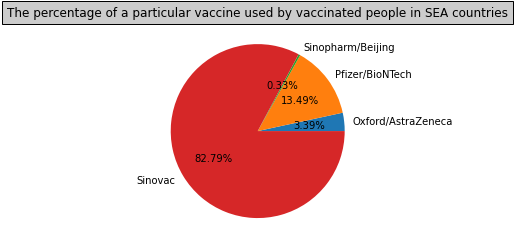

In [32]:
label = Pie_Chart['vaccines'] # plot a pie chart that has the labels of the vaccines
value = Pie_Chart['total_vaccinations'] # plot the pie chart based on the value of each type of vaccines
plt.pie(Pie_Chart['total_vaccinations'],labels = label,autopct='%1.2f%%') # plot the pie chart, autopct='%1.2f%%' make sure percentage is printed out
plt.title("The percentage of a particular vaccine used by vaccinated people in SEA countries", 
          bbox={'facecolor':'0.8', 'pad':5}) # the title of the pie chart, bbox={'facecolor':'0.8', 'pad':5} makes the title more obvious
plt.show()

#### Explanation

The explanation for using a pie chart: In this question, I had decided to use a pie chart to show the percentage for the types of vaccine used by SEA countries. The reason I choose the pie chart is that the pie chart provides better visualization in this situation and can summarize all the data in a good visual form since it is relatively easy to understand what the information shows in the pie chart. Unlike bar charts, if I decide to use a bar chart in this situation, people would not get any useful information by visualizing it since a bar chart cannot give the estimation on the percentage of a particular used by SEA countries, except just the numbers of each vaccine used by people. Hence, I think a pie chart would be the most appropriate chart for this question.

However, I did not include the people that are not vaccinated in this pie chart, it is because if I do so, it would affect the looks of the pie chart and not able to provide any useful information, since there would be a huge proportion of the pie chart represent the number of people without vaccinated and cannot see the percentage for the four types of vaccines.

#### Some insights

Assuming the currently available vaccines are equally distributed to the SEA countries, the pie chart shows the percentage for the types of vaccines to be used by the people regardless of their nationality. Based on the pie chart, Sinovac is the most popular vaccine, followed by Pfizer/BioNTech, Oxford/AstraZeneca, and Sinopharm/Beijing. According to the pie chart, around 80% of people that are vaccinated use Sinovac, whereas only approximately 0.33% of people use Sinopharm/Beijing. However, in my point of view, the percentage of people using which type of vaccine does not imply the quality of the vaccines. In my opinion, the reason for Sinovac to be popular may be because Sinovac is easily accessible by SEA countries, and Sinopharm/Beijing may be popular in other countries besides SEA countries.

# Question 2

#### First bar chart

In [33]:
fun4 = {'population':'sum','total_vaccinations':'sum','people_fully_vaccinated':'sum'}
# the aggregation is applied to the columns 'population', 'total_vaccinations', 'people_fully_vaccinated' and the 
# aggregation operation is sum for all
Bar_Chart = Final_DataFrame.groupby('country').agg(fun4) # group by country with the group by operation
Bar_Chart = Bar_Chart.reset_index() # make sure all the column headers are at the same level
Bar_Chart

,country,population,total_vaccinations,people_fully_vaccinated
0,Brunei Darussalam,433000,0.0,0.0
1,Cambodia,16487000,8171.0,0.0
2,Indonesia,270626000,2022788.0,825650.0
3,Lao PDR,7169000,0.0,0.0
4,Malaysia,31950000,0.0,0.0
5,Myanmar,54045000,82823.0,0.0
6,Philippines,108117000,0.0,0.0
7,Singapore,5804000,329630.0,110000.0
8,Thailand,69626000,0.0,0.0
9,Timor-Leste,1293000,0.0,0.0


Text(0.5, 1.0, 'Population, Total Vaccinations and People Fully Vaccinated in SEA Countries')

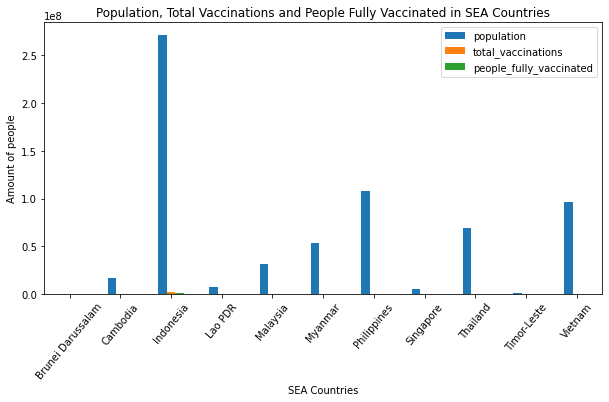

In [34]:
ax=Bar_Chart.plot.bar(figsize=(10,5)) # plot the bar chart, adjust the figure size by using the code figsize=(10,5)
ax.set_xticklabels(Bar_Chart['country'],rotation=50) # plot the bar chart for all SEA Countries
plt.xlabel('SEA Countries') # the x-axis label
plt.ylabel('Amount of people') # the y-axis label
plt.title('Population, Total Vaccinations and People Fully Vaccinated in SEA Countries') # the title of bar chart

The explanation for the issue of the bar chart above: Since there is a huge difference in the numbers of the population in Indonesia compared with other countries and also Indonesia's population with its numbers for total vaccinations and people fully vaccinated. Hence, it does not provide a good visualization and any useful information by just looking at the bar chart above.

#### Second bar chart

In [35]:
fun5 = {'population':'sum','total_vaccinations':'sum','people_fully_vaccinated':'sum'}
# the aggregation is applied to the columns 'population', 'total_vaccinations', 'people_fully_vaccinated' and the 
# aggregation operation is sum for all
Bar_Chart_2 = Final_DataFrame.groupby('country').agg(fun4) # group by country with the operation
Bar_Chart_2 = Bar_Chart_2.reset_index() # make sure all the column headers are at the same level
Bar_Chart_2['population'] = np.log2(Bar_Chart_2['population'])*100000 # convert population as log(2)x * 100000 form
# where x is the value of population
Bar_Chart_2.rename(
    columns = {'population': 'population in log2(x)*100000 form'},
    inplace = True
) # rename the column
Bar_Chart_2

,country,population in log2(x)*100000 form,total_vaccinations,people_fully_vaccinated
0,Brunei Darussalam,1.872401e+06,0.0,0.0
1,Cambodia,2.397483e+06,8171.0,0.0
2,Indonesia,2.801173e+06,2022788.0,825650.0
3,Lao PDR,2.277334e+06,0.0,0.0
4,Malaysia,2.492931e+06,0.0,0.0
5,Myanmar,2.568766e+06,82823.0,0.0
6,Philippines,2.668802e+06,0.0,0.0
7,Singapore,2.246862e+06,329630.0,110000.0
8,Thailand,2.605312e+06,0.0,0.0
9,Timor-Leste,2.030229e+06,0.0,0.0


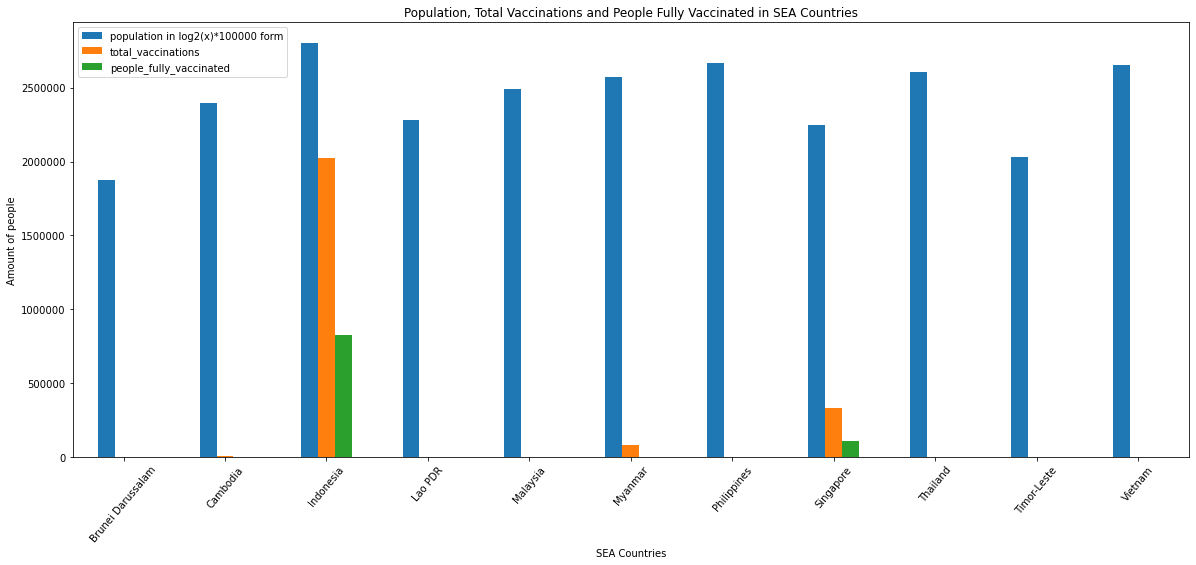

In [36]:
ax=Bar_Chart_2.plot.bar(figsize=(20,8)) # plot the bar chart, adjust the figure size by using the code figsize=(20,8)
ax.set_xticklabels(Bar_Chart['country'],rotation=50) # plot the bar chart for all SEA Countries
plt.xlabel('SEA Countries')  # the x-axis label
plt.ylabel('Amount of people')  # the y-axis label
plt.title('Population, Total Vaccinations and People Fully Vaccinated in SEA Countries') # the title of bar chart
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # remove the scientific notation when represting the value

#### Explanation

The explanation for the new bar chart: In this bar chart, I show the population of each SEA country in log2(x)*100000 form, where x is the population of that particular country. The reason is that it reduces the differences in numbers in terms of population, total vaccination, and people fully vaccinated for all SEA countries, especially Indonesia's population. By doing so, the gap between bars is decreased and people are now able to be conscious about the number of total vaccinations and people fully vaccinated as the bars are more obvious than they were in the first bar chart. In addition, the second bar chart still retains the correct information, only that people now are required to convert the population back to get the exact value.


The drawback of using the new bar chart: Since I had converted the population to log2(x)*100000 forms, where x is the population of that particular country, this would cause misleading and confusion for people. The reason is that by visualizing the bar chart, it seems there are not many differences in population between Indonesia and other SEA countries, however, it is not true as you can see from the data frame itself, the population of Indonesia is much higher than other countries. In conclusion, even though the new bar chart provides good visualization, people who analyze the bar chart have to remember to convert back the population to get the most accurate information.

Some analysis by visualizing the new bar chart: Based on the new bar chart, I realized that Indonesia has the highest value in all three categories. It is clear to see that most of the SEA countries are now having difficulty getting vaccines as most of the SEA countries don't even have vaccines. Besides that, only Indonesia and Singapore have a citizen that is fully vaccinated, whereas other countries don't have. By looking at the bar chart, the bar for Myanmar in total_vaccination can barely be seen, same as Cambodia. Overall, SEA countries should work hard on the supply of vaccination to ensure the safety of their citizens.

# Question 3

In [37]:
vaccinations_Singapore =  pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Covid-19-Vaccines-Data-Analysis\data\Vaccinations.csv")
# read the vaccination csv file 

#### Line graph for daily vaccination over time

In [38]:
Only_Singapore = vaccinations_Singapore[vaccinations_Singapore['country'] == 'Singapore'] # filter the dataframe
# only select the row if 'country' is equal to 'Singapore'
Only_Singapore.head() # show the first 5 rows

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3467,Singapore,SGP,2021-01-11,3400.0,3400.0,NaN,NaN,NaN,0.06,0.06,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
3468,Singapore,SGP,2021-01-12,6200.0,6200.0,NaN,2800.0,2800.0,0.11,0.11,NaN,479.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
3469,Singapore,SGP,2021-01-13,NaN,NaN,NaN,NaN,4090.0,NaN,NaN,NaN,699.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
3470,Singapore,SGP,2021-01-14,NaN,NaN,NaN,NaN,4520.0,NaN,NaN,NaN,773.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
3471,Singapore,SGP,2021-01-15,NaN,NaN,NaN,NaN,4735.0,NaN,NaN,NaN,809.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...


In [39]:
fun6 = {'daily_vaccinations':'sum'} 
# the aggregation is applied to the columns 'daily_vaccinations' and the aggregation operation is sum
groupbySingapore = Only_Singapore.groupby('date').agg(fun6) # group by date with the group by operation
groupbySingapore = groupbySingapore.reset_index() # make sure all the column headers are at the same level
groupbySingapore["date"] = pd.to_datetime(groupbySingapore["date"]).dt.strftime('%m-%d') # change the format of date
groupbySingapore.head() # show the first 5 rows to check whether the format of date has been changed

,date,daily_vaccinations
0,01-11,0.0
1,01-12,2800.0
2,01-13,4090.0
3,01-14,4520.0
4,01-15,4735.0


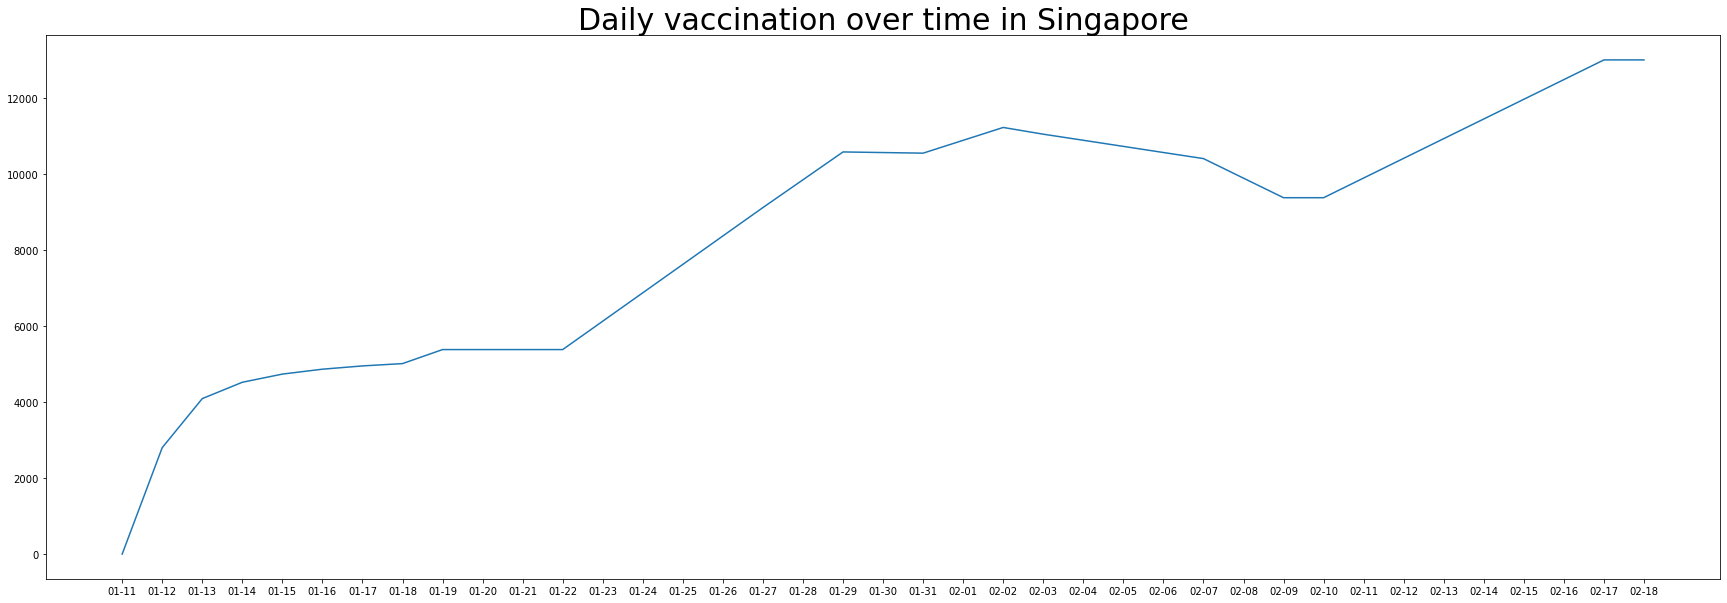

In [40]:
date = groupbySingapore['date'] # assigned variable date to the values in 'date' column
daily_vaccinations = groupbySingapore['daily_vaccinations'] 
# assigned variable daily_vaccinations to the values in 'daily_vaccinations' column
plt.figure(figsize=(30,10)) # plot the line graph, adjust the figure size by using the code figsize=(30,10)
plt.plot(date, daily_vaccinations) # plot the line graph
plt.title("Daily vaccination over time in Singapore",fontsize = 30) # the title of the line graph with font size of 30
plt.show()

#### Line graph for the cumulative vaccinations over time

In [41]:
fun7 = {'daily_vaccinations':'sum'}
# the aggregation is applied to the columns 'daily_vaccinations' and the aggregation operation is sum
groupbySingapore = Only_Singapore.groupby('date').agg(fun7) # group by date with the group by operation
groupbySingapore = groupbySingapore.reset_index() # make sure all the column headers are at the same level
groupbySingapore["date"] = pd.to_datetime(groupbySingapore["date"]).dt.strftime('%m-%d') # change the format of date
groupbySingapore['daily_vaccinations'] = groupbySingapore['daily_vaccinations'].cumsum() # calculate the cumulative sum 
groupbySingapore.rename(
    columns = {'daily_vaccinations':'total vaccinations for each day'},
    inplace = True
) # rename the column
groupbySingapore.head() # show the first 5 rows

,date,total vaccinations for each day
0,01-11,0.0
1,01-12,2800.0
2,01-13,6890.0
3,01-14,11410.0
4,01-15,16145.0


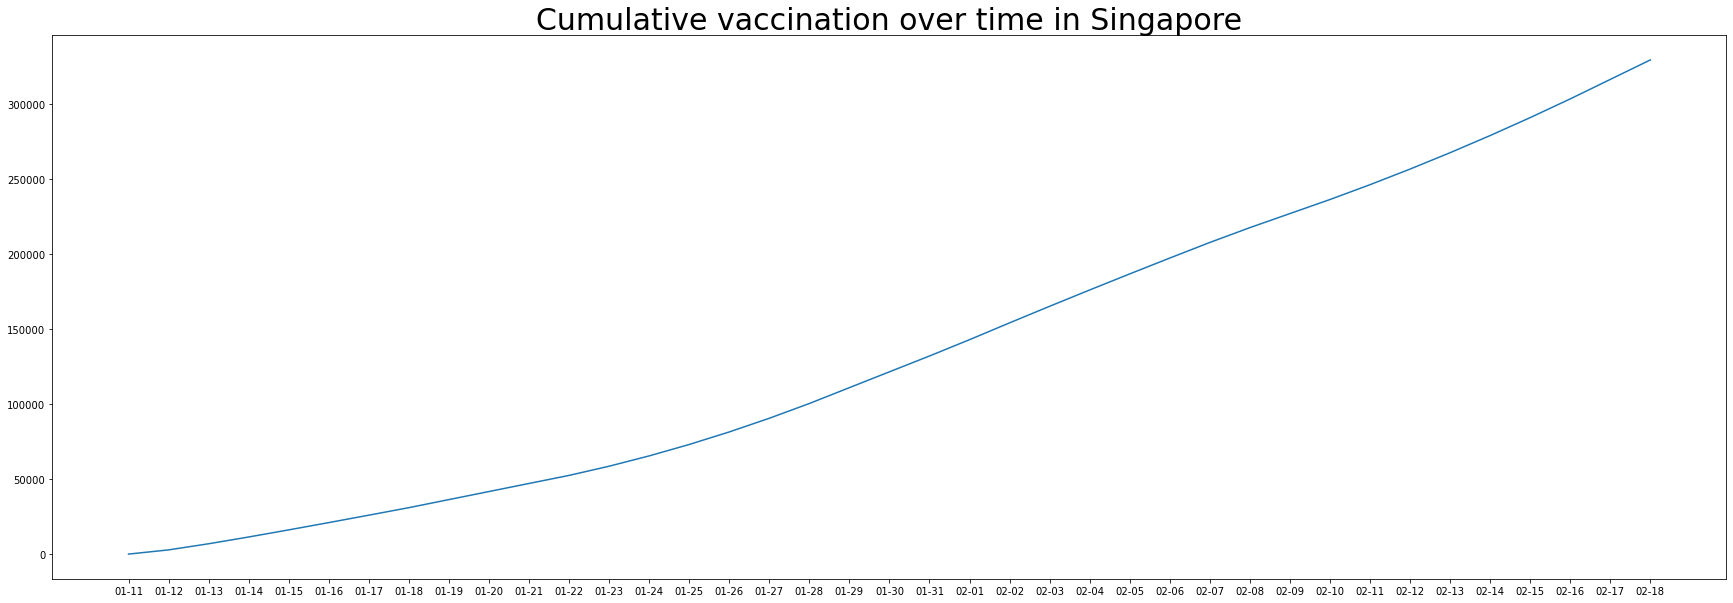

In [42]:
date = groupbySingapore['date'] # assigned variable date to the values in 'date' column
cumulative_daily_vaccinations = groupbySingapore['total vaccinations for each day']
# assigned variable daily_vaccinations to the values in 'cumulative_daily_vaccinations' column
plt.figure(figsize=(30,10)) # plot the line graph, adjust the figure size by using the code figsize=(30,10)
plt.plot(date, cumulative_daily_vaccinations) # plot the line graph
plt.title("Cumulative vaccination over time in Singapore",fontsize = 30) # the title of the line graph with font size of 30
plt.show()

#### In what circumstances would the first line graph be useful?

From my point of view, the first line graph would be useful if the government tried to visualize the increase and decrease in the number of daily vaccinations in a more detailed way. The first line graph perfectly shows how the number of daily vaccinations in Singapore is changing day by day and also the fluctuation in daily vaccination. When there is a decline in the number of daily vaccinations, for instance, from 2-07 to 2-09, the government can be conscious about it and the government can take appropriate measures to improve the situation. Unlike the second line graph, it shows the cumulative sum of vaccinations over time. By visualizing the second graph, the government would not be able to discover any fluctuation in daily vaccination, which would not be useful for the government to decide whether they should increase the daily vaccination or not.

#### In what circumstances would the second line graph be useful?

As far as I am concerned, the second line graph would be useful when the government or the citizens in Singapore are trying to check the current total of vaccination in Singapore. During the covid-19 pandemic, I believe all the citizens including the government would be extremely concerned about the pandemic situation in their country. Hence, by visualizing the second line graph, they can estimate how many total vaccinations are available on that current day and can predict how safe their country is. Unlike the first line graph, which only shows the number of vaccination on that single day, it is difficult for them to visualize the total vaccination available as they have to sum up all the daily vaccination on the previous day. Since they have to do an additional mathematical operation that contains a high risk of making an error to get the information that they wanted, I would suggest using the second line graph in this kind of circumstances.

# Extra Questions

# Conclusion

Overall, I think that SEA countries lack the supply of vaccination, during the current pandemic situation of covid-19 in SEA countries, we need much more vaccines than we currently have as the total population of SEA countries is pretty large. By looking at the data, people might think Indonesia is safer than other countries as they have more vaccines, but that is not true. Their population is also the largest, hence in terms of safety, Singapore would be safer than most SEA countries as Singapore has less population compared with others. This assignment also provides me an opportunity to know the economy of all SEA countries. It is interesting to know that GDP per capita for Singapore was much higher than the rest of the SEA countries, this proves how strong the economy of Singapore is.

On the other hand, I think it is better to use the data for GDP and population to calculate GDP per capita would be much better. The reason is that by doing so, we can analyze their economy during the pandemic since covid-19 starts on 31 Dec 2019. By looking at the GDP and population for all SEA countries in 2020, we can see how well all SEA countries do and also makes our data more reliable and up-to-date. 